In [3]:
#Based off recsys ising starter code

import matplotlib.pyplot as plt
import pyGMs as gm
import numpy as np
import time
import pickle
import numpy as np
import pyGMs.ising

'''
start_time = time.process_time_ns()
time_elasped = time.process_time_ns() - start_time
print(time_elasped/(10**9))
'''

with open('user_dict.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
with open('train_users.pkl', 'rb') as file:
    loaded_training = pickle.load(file)
with open('test_users.pkl', 'rb') as file:
    loaded_test = pickle.load(file)
    
Xtr = np.asarray([loaded_data[x] for x in loaded_training])
Xte = np.asarray([loaded_data[x] for x in loaded_test])

Xtr_missing = np.where(np.isnan(Xtr), -1, Xtr).astype(int)
Xte_missing = np.where(np.isnan(Xte), -1, Xte).astype(int)
Xtr = (Xtr >= 4).astype(int)   # did each user like the movie?  (binary)
Xte = (Xte >= 4).astype(int)

mUsers, nMovies = Xtr.shape

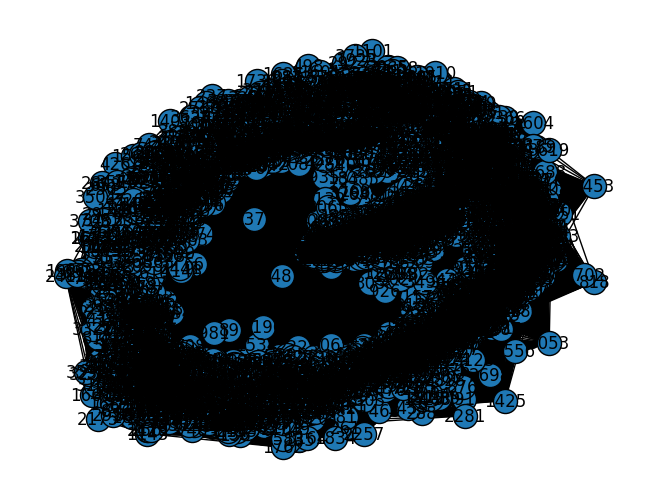

In [4]:
train_len =  [50, 100, 500, 1000, 2500, 5040]
c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for x in train_len:
    for y in c_vals:
        file = open("rawResults.txt", "a")
        file.write(f"{x}\t{y}\t")
        start_time = time.process_time_ns()
        ising_l1 = gm.ising.fit_logregL1(Xtr[:x], C=y)
        time_elasped = time.process_time_ns() - start_time
        file.write(f"{time_elasped/(10**9)}\t")
        plt.figure(figsize=(8,8));
        gm.drawMarkovGraph(ising_l1);
        plt.savefig(f"Markov_{x}_{y}.png")
        file.write(f"{ising_l1.pseudolikelihood(Xtr[:x]).mean()}\t")
        file.write(f"{ising_l1.pseudolikelihood(Xte).mean()}\n")
        file.close()